# Multiclass Classification
Reauters dataset  
Classify 46 topics from the dataset

In [1]:
from tensorflow.keras.datasets import reuters

# Data Load

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Data Preprocessing

In [3]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [4]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [6]:
# y_train = to_categorical(train_lables)
y_train = to_one_hot(train_labels)

# y_test = to_categorical(test_labels)
y_test = to_one_hot(test_labels)

# Build & Train model

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 12s 25ms/step - loss: 2.6498 - accuracy: 0.5182 - val_loss: 1.7549 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4121 - accuracy: 0.7110 - val_loss: 1.2907 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0398 - accuracy: 0.7721 - val_loss: 1.1290 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8204 - accuracy: 0.8231 - val_loss: 1.0542 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6557 - accuracy: 0.8641 - val_loss: 0.9897 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5224 - accuracy: 0.8930 - val_loss: 0.9592 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4237 - accuracy: 0.9131 - val_loss: 0.9125 - val_accuracy: 0.8130
Epoch 8/20
1

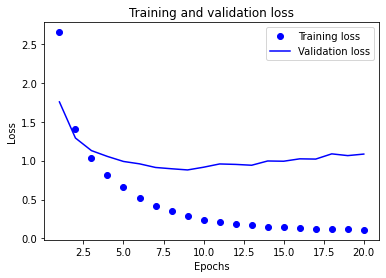

In [13]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

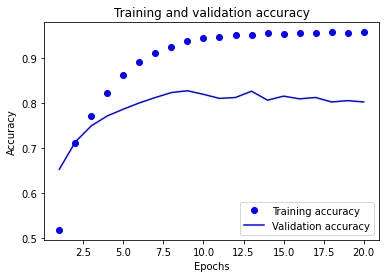

In [14]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()